# 第2章 分類問題 （三好） 2017-0204
## -- 機械学習アルゴリズムのトレーニング

主にやること  
・パーセプトロン  
・ADALINE (Adaptive Linear Neuron)  
を分類問題に適用

[用いるデータ]  
Iris データセット

<img src="./picture/iris.jpeg">

***

## 2.1 ニューロンの話  
初期の機械学習について

活性化関数 $\phi(z)$：１（陽性クラス），０（陰性クラス）  

$z = w_0 x_0 + w_1 x_1 + \cdots +w_m x_m = \vec{w}^T \vec{x} $ 

**要素還元主義的なアイディア**:  
複雑な事物をそれを構成する要素に分解し，個々の要素の性質や振る舞いを理解することにより，全体の性質や振る舞いを
理解できるとする考え方

___
**パーセプトロンの初期の学習規則**

1. 重みを$0$または値の小さい乱数で初期化
2. トレーニングサンプル $x^{i}$ごとに以下の手順を実行
    1. 出力値 $\hat{y}$ を計算する
    2. 重みを更新する

\begin{equation}
w_j = w_j + \Delta w_j
\end{equation}

\begin{equation}
\Delta w_j = \eta(y^{i} - \hat{y}^{i})x_{j}^i
\end{equation}

$\eta$は学習率，(0~1)   

パーセプトロンの収束が保証されるのは，２つのクラスが線形分離可能で学習率が十分に小さい場合に限られる．

----

## 2.2 パーセプトロンの学習アルゴリズム

In [1]:
import numpy as np

In [60]:
class Perceptron(object):
    #default
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.ones(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update * (xi)
                self.w_[0] += update
                errors += int(update !=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
            

np.where(a >=4,1,-1)  
4以上のところは1, それ以外は-1

それぞれのパラメータの説明  
* eta : 学習率  
* n_iter : エポック数  
* fit : パーセプトロンの学習規則に従って重みを更新する  
* np.dot : $\omega^{\top}x$を計算  

## 2.3 Iris データセットでパーセプトロンモデルのトレーニング

Setosa と Versicolor　の二つの品種クラスを読み込む．
ここでは可視化のために「がく片の長さ」と「花びらの長さ」の二つの特徴量のみを対象．

In [19]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


df.tail() 後ろの5個を表示

次すること  
* 50枚の花に対応する先頭の100個のクラスラベルを抽出  
* クラスラベルを1, -1　に変換  
* 100 個のトレーニングサンプルの特徴量の列から1 列目と3 列目を抽出  

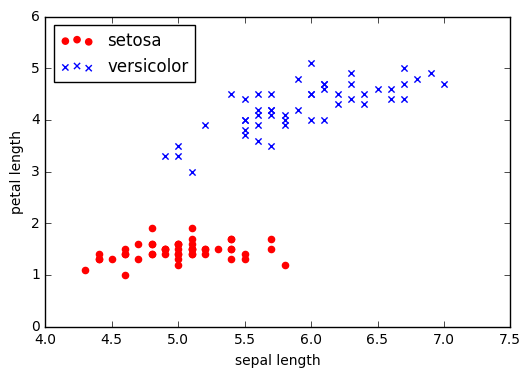

In [33]:
import matplotlib.pyplot as plt
import numpy as np
y = df.ix[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50,0],X[:50,1], color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()


### パーセプトロンのトレーニング

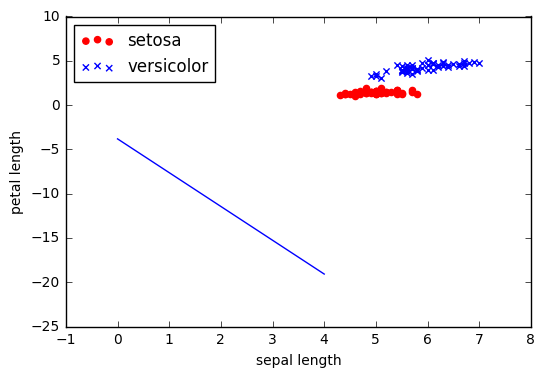

"\nplt.plot(range(1,len(ppn_.errors_)+1),ppn.errors_,marker='o')\nplt.xlabel('Epochs')\nplt.ylabel('Number of misclassification')\nplt.show()\n"

In [121]:
ppn = Perceptron(eta=0.01)
#print(ppn.eta)

ppn.fit(X,y)
#print(ppn.fit(X,y).w_) method chain
#print(ppn.w_)
w = ppn.w_
x = np.arange(5)
y = -w[1]/w[2]*x -w[1]/w[2]
plt.plot(x,y)
plt.scatter(X[:50,0],X[:50,1], color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()


'''
plt.plot(range(1,len(ppn_.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassification')
plt.show()
'''

次への課題！グラフがおかしい・・・

### 6 epoch ですでに収束，トレーニングサンプルを完全に分類できるようになっている． 
簡単なプロット関数を実装

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    makers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    

### <パーセプトロンの問題点>  
パーセプトロンの学習規則が収束するのは２つのクラスを線形超平面によって分割できる場合．
完全に分割できない場合は重みはいつまでも更新され続けることになる．
→　現実世界は分割できないことが多い！

## 2.4 Adaline は次週・・・(^m^) 